In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
dataset_train = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/17_SVM/SalaryData_Train.csv")
dataset_test = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/17_SVM/SalaryData_Test.csv")

In [3]:
dataset_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
dataset_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [17]:
dataset_test.info()##checking null and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [4]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [5]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [6]:
def ROC_AUC(y_test,y_pred_prob):
    classes = "0 vs 1"

    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linestyle='--', label='%s (AUC=%0.2f)' % (classes, roc_auc))

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

   
    auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
    print("AUC_Score: ",auc_score)

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

dataset_train['workclass']= label_encoder.fit_transform(dataset_train['workclass'])
dataset_train['education']= label_encoder.fit_transform(dataset_train['education'])
dataset_train['maritalstatus']= label_encoder.fit_transform(dataset_train['maritalstatus'])
dataset_train['occupation']= label_encoder.fit_transform(dataset_train['occupation'])
dataset_train['relationship']= label_encoder.fit_transform(dataset_train['relationship'])
dataset_train['race']= label_encoder.fit_transform(dataset_train['race'])
dataset_train['sex']= label_encoder.fit_transform(dataset_train['sex'])
dataset_train['native']= label_encoder.fit_transform(dataset_train['native'])
dataset_train['Salary']= label_encoder.fit_transform(dataset_train['Salary'])

dataset_test['workclass']= label_encoder.fit_transform(dataset_test['workclass'])
dataset_test['education']= label_encoder.fit_transform(dataset_test['education'])
dataset_test['maritalstatus']= label_encoder.fit_transform(dataset_test['maritalstatus'])
dataset_test['occupation']= label_encoder.fit_transform(dataset_test['occupation'])
dataset_test['relationship']= label_encoder.fit_transform(dataset_test['relationship'])
dataset_test['race']= label_encoder.fit_transform(dataset_test['race'])
dataset_test['sex']= label_encoder.fit_transform(dataset_test['sex'])
dataset_test['native']= label_encoder.fit_transform(dataset_test['native'])
dataset_test['Salary']= label_encoder.fit_transform(dataset_test['Salary'])



Accuracy of svm classifier on training set: 0.7960
Accuracy of svm classifier on test set: 0.7964


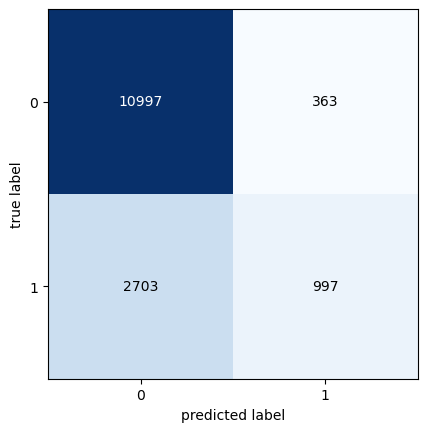


Accuracy: 0.80

Micro Precision: 0.80
Micro Recall: 0.80
Micro F1-score: 0.80

Macro Precision: 0.77
Macro Recall: 0.62
Macro F1-score: 0.64

Weighted Precision: 0.79
Weighted Recall: 0.80
Weighted F1-score: 0.76

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

AUC score 0.6187526170536735


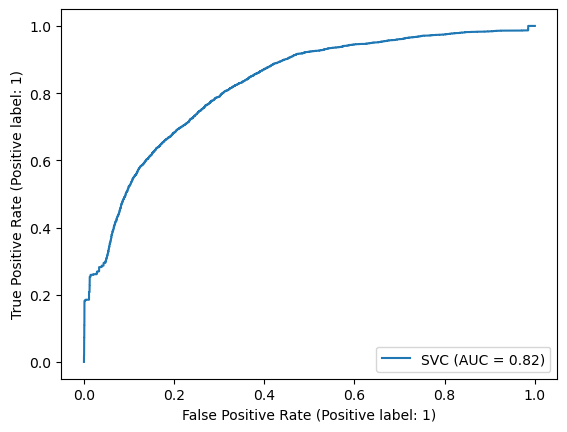

In [14]:
def model(dataset_train,dataset_test):  
    
    X_train = dataset_train.iloc[:,:-1] 
    y_train = dataset_train.iloc[:,-1]
    X_test = dataset_test.iloc[:,:-1] 
    y_test = dataset_test.iloc[:,-1]
  
    
    clf= SVC()
    clf.fit(X_train, y_train)
    print('Accuracy of svm classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of svm classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test) 
    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)
    
    metrics.plot_roc_curve(clf,X_test,y_test)
    print("AUC score", metrics.roc_auc_score(y_test,y_pred))

model(dataset_train,dataset_test)


Accuracy of svm classifier on training set: 0.8513
Accuracy of svm classifier on test set: 0.8465


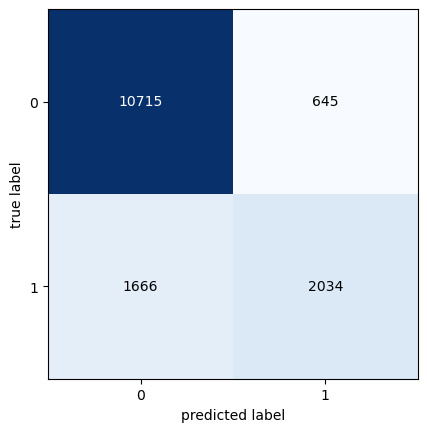


Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.81
Macro Recall: 0.75
Macro F1-score: 0.77

Weighted Precision: 0.84
Weighted Recall: 0.85
Weighted F1-score: 0.84

Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.76      0.55      0.64      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060

AUC score 0.7464757803578226


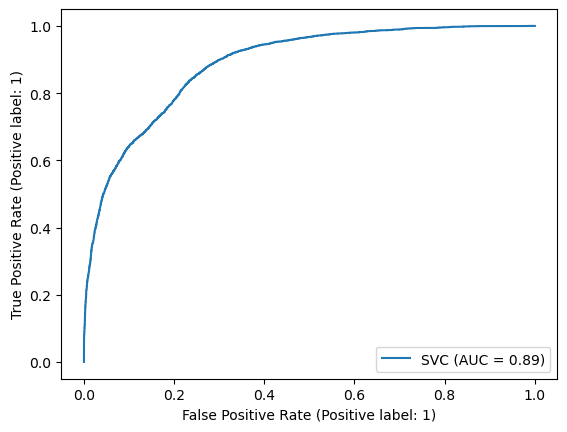

In [15]:
def model_scaling(dataset_train,dataset_test):
    X_train = dataset_train.iloc[:,:-1] 
    y_train = dataset_train.iloc[:,-1]
    X_test = dataset_test.iloc[:,:-1] 
    y_test = dataset_test.iloc[:,-1]
    
    from sklearn.preprocessing import StandardScaler
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)

    from sklearn.neighbors import KNeighborsClassifier
    clf= SVC()
    clf.fit(X_train, y_train)
    print('Accuracy of svm classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of svm classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X)

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    metrics.plot_roc_curve(clf,X_test,y_test)
    print("AUC score", metrics.roc_auc_score(y_test,y_pred)) 
    
model_scaling(dataset_train,dataset_test)

In [8]:
#PCA to reduce dimensions 
X_train = dataset_train.iloc[:,:-1] 
y_train = dataset_train.iloc[:,-1]
X_test = dataset_test.iloc[:,:-1] 
y_test = dataset_test.iloc[:,-1]



# from sklearn.decomposition import PCA
# pca=PCA()
# pca_values=pca.fit_transform(X_train)
# X_test=pca.transform(X_test)

In [ ]:
# var=np.cumsum(pca.explained_variance_ratio_)
# plt.plot(var)

In [ ]:
# ##Taking first 18 principal components which covers 70% of the variance in the data
# x1=pca_values[:,:18]
# xtest=X_test[:,:18]

In [10]:
##hyper parameter tuning
gamma=[0.1,0.01,0.001,0.0001]
c=[10,0.1,0.001,0.0001]
kernel = ['rbf','sigmoid','poly']

params=[]
accuracy=[]

for i in kernel:
    for j in c:
        for k in gamma:
            clf=SVC(kernel=i,C=j,gamma=k)
            clf.fit(X_train,y_train)
            pred=clf.predict(X_test)
            acc=accuracy_score(y_test,pred)
            print(acc)
            params.append((i,j,k))
            accuracy.append(acc)
np.max(accuracy)

0.8432934926958832
0.8443559096945551
0.8249667994687915
0.8068393094289509
0.8372509960159362
0.8208499335989375
0.7750332005312085
0.7554448871181939
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.751195219123506
0.7777556440903054
0.8091633466135458
0.8017928286852589
0.7560424966799468
0.8019256308100929
0.7596945551128818
0.7543160690571049
0.7596945551128818
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.8401726427622842
0.7963479415670651
0.7596945551128818
0.7543160690571049
0.8335989375830013
0.7601593625498008
0.7543160690571049
0.7543160690571049
0.7709163346613546
0.7543160690571049
0.7543160690571049
0.7543160690571049
0.7601593625498008
0.7543160690571049
0.7543160690571049
0.7543160690571049


0.8443559096945551

In [11]:
params[accuracy.index(np.max(accuracy))]

('rbf', 10, 0.01)

Accuracy of svm classifier on training set: 0.8874
Accuracy of svm classifier on test set: 0.8548


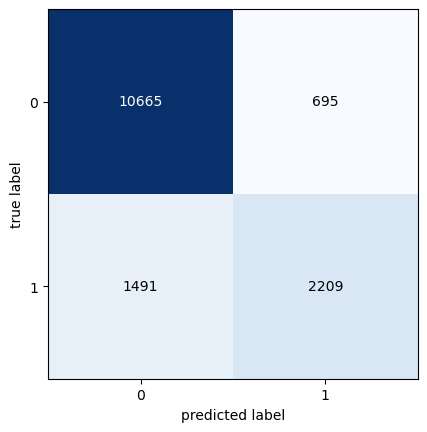


Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.82
Macro Recall: 0.77
Macro F1-score: 0.79

Weighted Precision: 0.85
Weighted Recall: 0.85
Weighted F1-score: 0.85

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.76      0.60      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.77      0.79     15060
weighted avg       0.85      0.85      0.85     15060

AUC score 0.7679237247811191


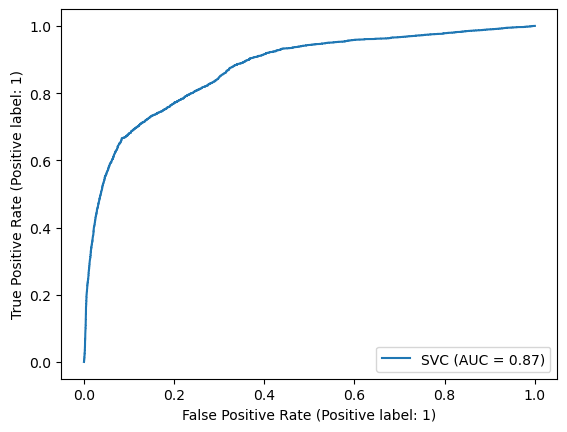

In [18]:
def model_tuned(dataset_train,dataset_test):
    X_train = dataset_train.iloc[:,:-1] 
    y_train = dataset_train.iloc[:,-1]
    X_test = dataset_test.iloc[:,:-1] 
    y_test = dataset_test.iloc[:,-1]

    
    clf= SVC(C= 10, gamma= 0.01, kernel= 'rbf')
    clf.fit(X_train, y_train)
    print('Accuracy of svm classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of svm classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X_test)
#     y_pred_prob=clf.predict_proba(X)
    
   
        
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    metrics.plot_roc_curve(clf,X_test,y_test)
    print("AUC score", metrics.roc_auc_score(y_test,y_pred))    
model_tuned(dataset_train,dataset_test)


## After hyperparameter tuning, the model is giving best accuracy. Hence this model can be used for classification of salary.
